## Monolingual Named Entity Recognition Token Classification (WikiNeural Dataset)

Dataset Source: https://huggingface.co/datasets/Babelscape/wikineural

This is the Exploratory Data Analysis File for all of the projects included in this comparison.

#### Import Necessary Libraries

In [1]:
import os, sys
from collections import Counter, defaultdict
os.environ['TOKENIZERS_PARALLELISM']='false'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datasets
from datasets import load_dataset, DatasetDict

#### Display Library Versions

In [2]:
print("Python :".rjust(18), sys.version[0:6])
print("NumPy :".rjust(18), np.__version__)
print("Pandas :".rjust(18), pd.__version__)
print("datasets :".rjust(18), datasets.__version__)

          Python : 3.9.12
           NumPy : 1.24.3
          Pandas : 2.0.1
        datasets : 2.11.0


#### Ingest English Subset of Dataset

In [3]:
data = load_dataset("Babelscape/wikineural")

data = data.remove_columns(["lang"])

data

Found cached dataset parquet (/Users/briandunn/.cache/huggingface/datasets/Babelscape___parquet/Babelscape--wikineural-579d1dc98d2a6b93/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/27 [00:00<?, ?it/s]

DatasetDict({
    train_es: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 76320
    })
    test_es: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 9618
    })
    test_de: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 12372
    })
    val_it: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 11050
    })
    train_en: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 92720
    })
    train_it: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 88400
    })
    train_nl: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 83680
    })
    train_pl: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 108160
    })
    test_pl: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 13585
    })
    val_ru: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 11540
    })
    test_nl: Dataset({


#### Split Dataset into DatasetDict

In [4]:
ds = DatasetDict({
    'train': data['train_en'], 
    'test': data['test_en'], 
    'eval': data['val_en']})

print('Training data shape:', ds['train'].shape)
print('Testing data shape:', ds['test'].shape)
print('Validation data shape:', ds['eval'].shape)

Training data shape: (92720, 2)
Testing data shape: (11597, 2)
Validation data shape: (11590, 2)


#### Example

In [5]:
example = ds['train'][12]

example

{'tokens': ['It',
  'has',
  'a',
  'leaf',
  'pattern',
  'similar',
  'to',
  'the',
  'members',
  'of',
  'the',
  'genera',
  '"',
  'Kedrostis',
  '"',
  ',',
  '"',
  'Melothria',
  '"',
  'and',
  '"',
  'Zehneria',
  '"',
  '.'],
 'ner_tags': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  7,
  0,
  0]}

#### Display Feature Information About Each Feature

In [6]:
for k, v in ds["train"].features.items():
    print(f"{k}: \n{v}\n")

tokens: 
Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)

ner_tags: 
Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)



#### Define Tag Values & Conversions Between String & Integer Values

In [8]:
label2id = {
    'O': 0, 
    'B-PER': 1, 
    'I-PER': 2, 
    'B-ORG': 3, 
    'I-ORG': 4, 
    'B-LOC': 5, 
    'I-LOC': 6, 
    'B-MISC': 7, 
    'I-MISC': 8
    }

id2label = {tag: idx for idx, tag in label2id.items()}

pos_tag_values = list(label2id.keys())
NUM_OF_LABELS = len(pos_tag_values)

print(f"List of tag values: \n{pos_tag_values}")
print(f"Number of NER Tags: \n{NUM_OF_LABELS}")
print(f"id2label: \n{id2label}")
print(f"label2id: \n{label2id}")

List of tag values: 
['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
Number of NER Tags: 
9
id2label: 
{0: 'O', 1: 'B-PER', 2: 'I-PER', 3: 'B-ORG', 4: 'I-ORG', 5: 'B-LOC', 6: 'I-LOC', 7: 'B-MISC', 8: 'I-MISC'}
label2id: 
{'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}


#### Convert to Pandas DataFrame

In [8]:
ds.set_format(type="pandas")

df = pd.concat([ds['train'][:], ds['test'][:], ds['eval'][:]])

df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115907 entries, 0 to 115906
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tokens    115907 non-null  object
 1   ner_tags  115907 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [9]:
df.head()

,tokens,ner_tags
0,"[This, division, also, contains, the, Ventana,...","[0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 5, 0, 0]"
1,"["", So, here, is, the, balance, NBC, has, to, ...","[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 7, 8, 0, 0, ..."
2,"[It, is, a, protest, song, that, "", creates, a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[This, differs, from, approaches, such, as, IP...","[0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, ..."
4,"[Since, then, ,, only, Terry, Bradshaw, in, 14...","[0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, ..."


#### Visual: Histogram of Input Lengths

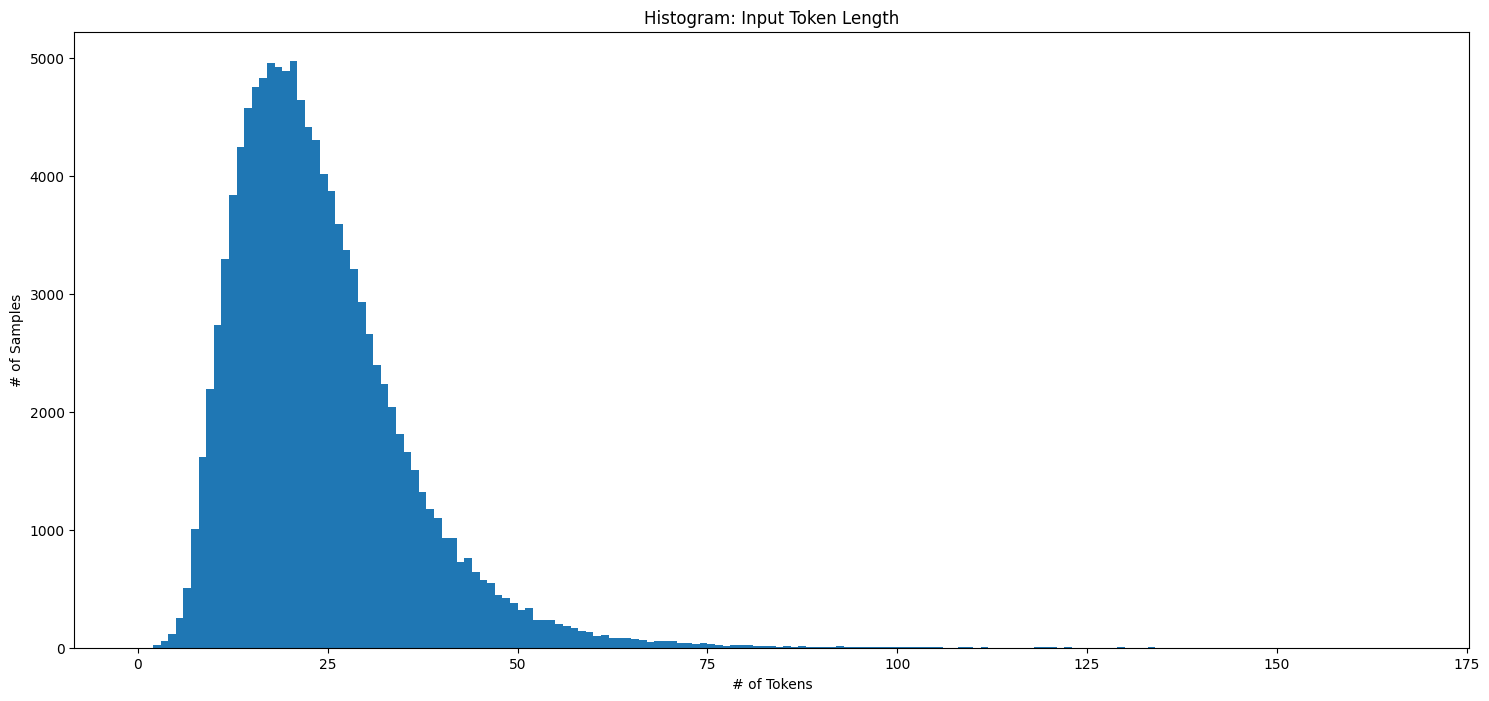

The maximum number of tokens is 165.


In [10]:
df['tokens_count'] = df['tokens'].str.len()

MAX_INPUT_TOKENS = max(df['tokens_count'])

n_bin=MAX_INPUT_TOKENS + 1
df.hist('tokens_count', 
          grid=False, 
          figsize=(18,8), 
          range=(0,n_bin + 1), 
          bins=n_bin + 1)
plt.title('Histogram: Input Token Length')
plt.xlabel('# of Tokens')
plt.ylabel('# of Samples')
plt.show()

print(f"The maximum number of tokens is {MAX_INPUT_TOKENS}.")

#### Prepare Dataset for Class Distribution Visual(s)

In [12]:
def count_numbers(numbers_list): 
    number_counts = Counter(numbers_list) 
    return number_counts

df['ner_tags'] = df['ner_tags'].tolist()
df['number_counts'] = df['ner_tags'].apply(lambda x: count_numbers(x))
df['number_counts'] = df['number_counts'].apply(lambda x: dict(x))

sum_dict = defaultdict(int)

for lst in df['number_counts']:
    # Iterate over the dictionaries in the list and sum the values
    for dct in lst:
        sum_dict[dct] += lst[dct]

sum_dict = dict(sum_dict)

key_values = list(sum_dict.keys())
key_values.sort()
sorted_dict = {i: sum_dict[i] for i in key_values}

class_frequencies = dict(zip((id2label.keys()), (sorted_dict.values())))

class_frequencies

{'O': 2405265,
 'B-PER': 51064,
 'I-PER': 37532,
 'B-ORG': 31186,
 'I-ORG': 25981,
 'B-LOC': 66761,
 'I-LOC': 23200,
 'B-MISC': 44841,
 'I-MISC': 42843}

#### Visual: Bar Plot of Class Distribution

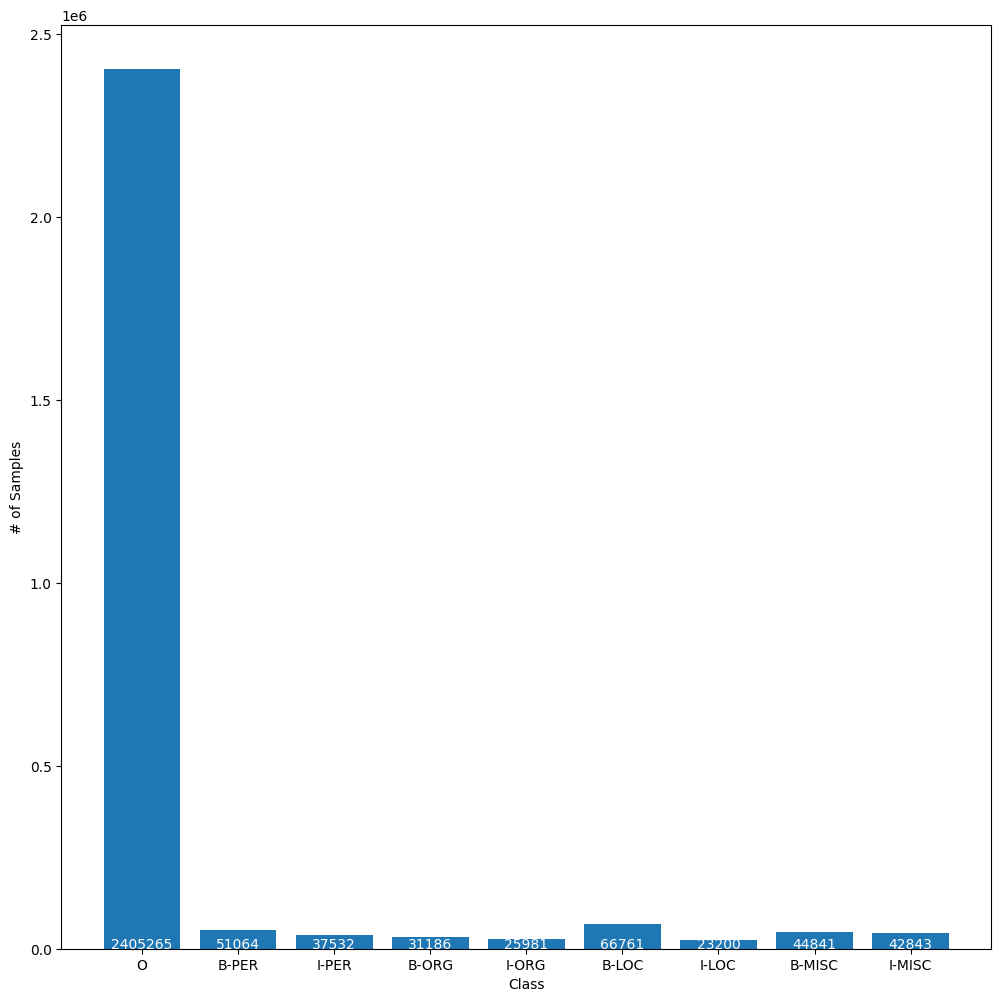

In [13]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, 1250, y[i], ha = 'center', **{'color': 'white'})

class_names = list(class_frequencies.keys())
values = list(class_frequencies.values())

plt.figure(figsize=(12, 12))
plt.bar(range(len(class_names)), values, tick_label=class_names)
addlabels(class_names, values)
plt.suptitle('')
plt.xlabel('Class')
plt.ylabel('# of Samples')
plt.xticks(rotation = 0)
plt.show()

#### Visual: Bar Plot of Class Distribution After Removing 'O'

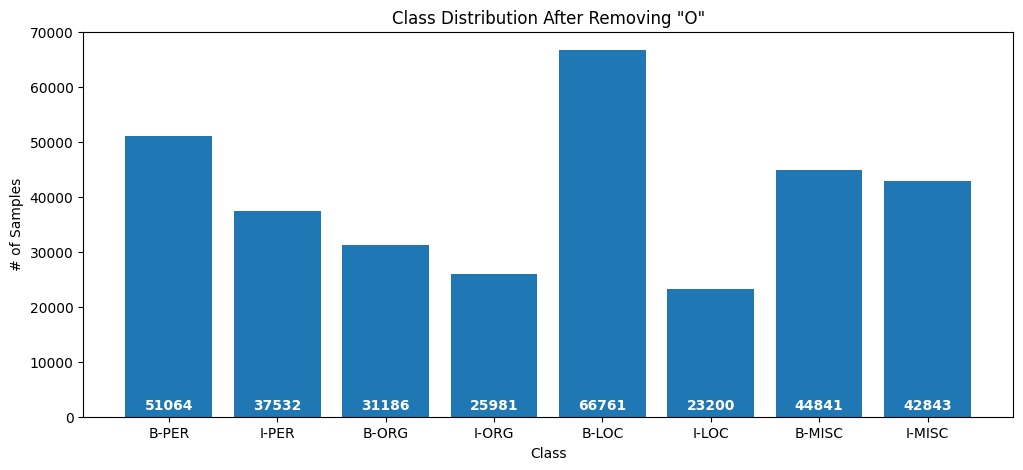

In [14]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, 1250, y[i], ha = 'center', **{'color': 'white', 'fontweight': 'bold'})

if 'O' in class_frequencies.keys():
    del class_frequencies['O']

class_names = list(class_frequencies.keys())
values = list(class_frequencies.values())

plt.figure(figsize=(12, 5))
plt.bar(range(len(class_names)), values, tick_label=class_names)
addlabels(class_names, values)
plt.suptitle('')
plt.title('Class Distribution After Removing "O"')
plt.xlabel('Class')
plt.ylabel('# of Samples')
plt.xticks(rotation = 0)
plt.show()